<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

# EDA on Online Retail Data

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/retail-marketing-blog.jpg" width="800" height="500" /></center>

## Table of Contents

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Importing Packages](#section3)<br>
4. [Loading Data](#section4)<br>
  - 4.1 [Description of the Datasets](#section401)<br>
  - 4.2 [Pandas Profiling before Data Preprocessing](#section402)<br>
5. [Data Preprocessing](#section5)<br>
  - 5.1 [Duplicate Rows](#section501)<br>
  - 5.2 [Check Missing Values](#section502)<br>  
  - 5.3 [Pandas Profiling after Data Preprocessing](#section503)<br>
6. [Exploratory Data Analysis](#section6)<br>
  - 6.1 [Analysis based on Customer Transactions](#section601)<br>
    - 6.1.1 [Checking unique values of each attribute](#section6011)<br>
    - 6.1.2 [How to verify the Cancelled Transactions?](#section6012)<br>
    - 6.1.3 [How many Cancelled Orders do we have?](#section6013)<br>
    - 6.1.4 [What's the average number of orders per customer?](#section6014)<br>
  - 6.2 [Analysis based on Products/Items](#section502)<br>
      - 6.2.1 [What's the average number of unique items per order?](#section6021)<br> 
      - 6.2.2 [How many products does the customer buy on an average?](#section6022)<br>
      - 6.2.3 [How many products did the customer buy in one purchase?](#section6023)<br>
  - 6.3 [Analysis based on Revenue](#section603)<br>
    - 6.3.1 [ What is the total revenue generated by the online retailer?](#section6031)<br>
    - 6.3.2 [ What is the average revenue per Customer?](#section6032)<br>
    - 6.3.3 [What is the total revenue per country?](#section6032)<br>
    - 6.3.4 [What is the monthly revenue of the online store?](#section6033)<br>
    - 6.3.5 [What is the monthly growth rate for the online retail store?](#section6034)<br>
    - 6.3.6 [What is the average revenue per order?](#section6035)<br>
  - 6.4 [Analysis based on Geographical location](#section604)<br>
    - 6.4.1 [What is the average monthly revenue in UK?](#section6041)<br>
    - 6.4.2 [Which products are most bought in UK?](#section6042)<br>
    - 6.4.3 [How many monthly active customers for UK?](#section6043)<br>
7. [Conclusion](#section7)
8. [Actionable Insights](#section8)

<a id=section1></a>
# 1. Introduction

Recently, it has been recognized that **precision marketing** has become a key means of generating profit and is becoming increasingly important as customers become better informed about the products and their rights as consumers. 

A novel **decision-making framework** for precision marketing is using **Exploratory Data Analysis**:


- To identify important attribute values to distinguish different **customer groups**. 


- To discover interesting **transactional patterns** of different customers and countries.


- To verify the assumption of **cancelled orders/invoices** that may help in preventing future cancellations.


- To get an overview of the general customers **purchase behavior**.

The availability of **customer data** and **transaction records** provides better understanding of customers’ **consumption behaviors** and **preferences**. In the increasingly competitive environment, enterprises have to create a decision-making model for precision marketing that provides appropriate strategies to manage the **market positioning system** for fulfilling their customers’ needs.

<center><img src = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/images/254-Retail__Precision_Marketing_BLOG.png' width="500" height="350"></center>

The motivation for this case study is stemmed from a real-world data. This case study considers a **marketing problem** where the **online retailer** provides different **all-occasion gift products** for customers and **wholesalers**, of which some may sell well in some customer segments and some may not. Products that are not sold will be returned back to the retailer. Therefore, the retailer needs to find a good **marketing strategy** that minimizes goods in stock and satisfies the retailer and consumers.

<center><img src = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/images/gifts-for-all-ocassions.png' width="500" height="350"></center>

The **decision-making framework** consists of the follwing steps:

1. Problem Statement


2. Data Preparation/Preprocessing


3. Exploratory Data Analysis


4. Decision-making

<center><img src = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/images/precision-marketing.jpg' width="500" height="350"></center>

The objective of the proposed precision-marketing framework is to **help managers identify the potential characteristics** of different customer categories and put forward appropriate precision marketing strategies, which can greatly **optimize inventory** for every customer category. The real-world data from a company in **UK** were collected and used in this case study to illustrate how to implement the proposed framework. This case study demonstrates that our proposed decision-making framework is efficient and capable of providing a very good precision marketing strategy for enterprises.

<a id=section2></a>
# 2. Problem statement

**Precision marketing** offers personalized customer service and is used to **help enterprises increase their profits** by means of high-efficiency marketing. 

<center><img src = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/images/002J6c0kxk4KybzERoTCtlH-1..v_1569492740.jpg' width="500" height="360"></center>

Due to the accelerated pace of **economic globalization** and increasing **market competition**, **economic pressures** and competition have led enterprise managers to face the problem.

- Choosing the right strategic decision-making policies for selling the **right products to the right customers** at the right time, such that the companies can increase their profits. 

<a id=section3></a>
# 3. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

from datetime import datetime, timedelta

<a id=section4></a>
# 4. Loading Data

In [2]:
retail_df = pd.read_excel('https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/online_retail.xlsx?raw=true')
retail_df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00,United Kingdom


<a id=section401></a>
## 4.1 Description of the Dataset

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| InvoiceNo                      | Invoice Number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a Cancellation                                                                      | 
| StockCode                      | Product (item) Code, a 5-digit integral number uniquely assigned to each distinct product                                                                                                                                 | 
| Description                    | Product (item) Name                                                                        | 
| Quantity                       | The quantities of each product (item) per transaction.                                     |
| InvoiceDate                    | Invoice Date and Time, the day and time when each transaction was generated                |
| UnitPrice                      | Unit price, Product price per unit in sterling                                             |
| CustomerID                     | Customer number, a 5-digit integral number uniquely assigned to each customer              |
| Country                        | Country Name, the name of the country where each customer resides                          |

If you look closely there are 4 themes in this dataset. The themes are as follows:


1. Transaction level data


2. Product/item level data


3. Finance level data


4. Geographic level data

In [ ]:
retail_df.shape

(541909, 8)

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000,541909.000,406829.000
mean,9.552,4.611,15287.691
std,218.081,96.760,1713.600
min,-80995.000,-11062.060,12346.000
25%,1.000,1.250,13953.000
50%,3.000,2.080,15152.000
75%,10.000,4.130,16791.000
max,80995.000,38970.000,18287.000


- We have some negative values in our dataset. Perhaps, this could mean that these quantities (with corresponding UnitPrice values) were returned or cancelled.

<a id=section402></a>
## 4.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [ ]:
# To install pandas profiling please run this command.
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 604kB 9.7MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 3.1MB 15.1MB/s 
     |████████████████████████████████| 296kB 33.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=7b3e7287bab8d188cc1dbb1fc2080817a97378a537030153ee8d919e1ec54193
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=07e53761e41d44c016b04c674b2534608a286f46f6ec4e6a5fdbe29838b53962
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [ ]:
import pandas_profiling 

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = pandas_profiling.ProfileReport(retail_df)
profile.to_file(output_file="profiling_before_preprocessing.html")


# To output the pandas profiling report on the notebook.

# retail_df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
- Number of variables: 8
- Number of observations: 541909
- Missing cells: 3.1%

__Variables types__: 
- Numeric = 3
- Categorical = 1
- Date = 1
- Unsupported = 3

- **Country** has **38** unique values.
- **United Kingdom** has the highest no. of buyers. 
- **Customer ID** has the highest no. of **missing** values
- The maximum **UnitPrice** is found to be **38970** steling


<a id=section5></a>
# 5. Data Preprocessing

<a id=section501></a>
## 5.1 Duplicate Rows

We'll start by checking the **duplicate** rows.

In [12]:
duplicates = retail_df[retail_df.duplicated(keep = 'last', False)]
print('There are {} duplicates out of total {} rows.'.format(duplicates.shape[0], retail_df.shape[0]))

SyntaxError: positional argument follows keyword argument (<ipython-input-12-8f6a3b9cb395>, line 1)

In [ ]:
duplicates.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [ ]:
# Lets check for duplicates 

retail_df[(retail_df['InvoiceNo'] == 536412) & (retail_df['StockCode'] == 22327) & (retail_df['CustomerID'] == 17920.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.00,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.00,United Kingdom


In [ ]:
# dropping duplicates

retail_df = retail_df.drop_duplicates()

retail_df.shape

print('Without duplicates the dataset contains {} rows.'.format(retail_df.shape[0]))

Without duplicates the dataset contains 536641 rows.


<a id=section502></a>
## 5.2 Check Missing Values

In [ ]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

- Only two variables **Description** and **CustomerID** has missing values.

In [ ]:
retail_df[retail_df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


- We can delete the missing values for **Description** variable because there are no corresponding **CustomerID** and **UnitPrice** values for them.

In [ ]:
retail_df.dropna(subset = ['Description'], inplace = True)

In [ ]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
Country             0
dtype: int64

In [ ]:
retail_df[retail_df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [ ]:
retail_df[retail_df.CustomerID.isnull()]['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
566325       1
566324       1
566323       1
549935       1
540673       1
Name: InvoiceNo, Length: 3710, dtype: int64

In [ ]:
list(retail_df[retail_df.CustomerID.isnull()]['InvoiceNo'].value_counts())

[1114,
 749,
 731,
 721,
 705,
 687,
 676,
 675,
 662,
 652,
 650,
 645,
 635,
 629,
 622,
 620,
 606,
 601,
 597,
 593,
 593,
 592,
 591,
 585,
 578,
 572,
 568,
 561,
 552,
 544,
 541,
 536,
 534,
 527,
 527,
 526,
 526,
 520,
 518,
 518,
 518,
 515,
 512,
 503,
 503,
 502,
 494,
 490,
 487,
 486,
 482,
 474,
 464,
 462,
 460,
 458,
 455,
 450,
 444,
 442,
 438,
 436,
 434,
 429,
 421,
 418,
 416,
 416,
 415,
 411,
 410,
 406,
 404,
 403,
 402,
 388,
 384,
 379,
 378,
 371,
 360,
 359,
 355,
 353,
 352,
 350,
 347,
 346,
 344,
 343,
 340,
 335,
 334,
 334,
 333,
 332,
 332,
 320,
 319,
 315,
 310,
 309,
 301,
 300,
 298,
 298,
 297,
 295,
 293,
 292,
 290,
 289,
 288,
 287,
 287,
 285,
 284,
 283,
 283,
 282,
 282,
 280,
 275,
 271,
 267,
 266,
 264,
 264,
 263,
 262,
 261,
 261,
 259,
 257,
 255,
 255,
 255,
 254,
 254,
 253,
 253,
 250,
 249,
 249,
 247,
 246,
 245,
 244,
 243,
 242,
 242,
 241,
 239,
 239,
 238,
 238,
 237,
 237,
 237,
 236,
 235,
 234,
 234,
 233,
 230,
 229,
 22

In [ ]:
for invoice in list(retail_df[retail_df.CustomerID.isnull()]['InvoiceNo'].value_counts()):
  print(retail_df[retail_df['InvoiceNo'] == invoice]['CustomerID'].unique().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
retail_df.dropna(subset = ['CustomerID'], inplace = True)

In [ ]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- Now, we don't have any missing values in the dataset to deal with.

<a id=section503></a>
## 5.3 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = pandas_profiling.ProfileReport(retail_df)
profile.to_file(output_file="profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

# retail_df.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

Now we have preprocessed the data, now the dataset doesnot contain missing values.So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e profiling_after_preprocessing.html and profiling_before_preprocessing.html.
In profiling_after_preprocessing.html report, observations:

In the Dataset info, 
- Total Missing(%) = 0.0%
- Number of variables = 9



<a id=section6></a>
## 6. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting, parsimonious model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section601></a>
## 6.1 Analysis based on Customer Transactions

<a id=section6011></a>
### 6.1.1 Checking unique values of each attribute

In [ ]:
# number of transactions occured between 01/12/2010 and 09/12/2011

print("Number of transactions:", retail_df['InvoiceNo'].nunique())

Number of transactions: 22190


In [ ]:
# number of distinct products

print("Number of products:",retail_df['StockCode'].nunique())

Number of products: 3684


In [ ]:
# number of unique customers the online retail has

print("Number of customers:", retail_df['CustomerID'].nunique())

Number of customers: 4372


In [ ]:
# number of countries where the company has customer base

print('Number of countries:', retail_df['Country'].nunique())

Number of countries: 37


<a id=section6012></a>
### 6.1.2 How to verify the Cancelled Transactions? 

- As mentioned in the description of the dataset, some InvoiceNo start with the letter "C" = Cancelled. 


- Let's see if our assumption is correct about the negative quantity: -80995.


- We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [ ]:
# cancelled transactions

cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
cancelled_orders.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000,8872.000,8872.000
mean,-30.775,18.900,14990.153
std,1172.250,445.191,1708.230
min,-80995.000,0.010,12346.000
25%,-6.000,1.450,13505.000
50%,-2.000,2.950,14868.000
75%,-1.000,4.950,16393.000
max,-1.000,38970.000,18282.000


- Here the minimium value of the **Quantity** is -80995. 

In [ ]:
#search for transaction where quantity == -80995

cancelled_orders[cancelled_orders['Quantity'] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [ ]:
cancelled_orders[cancelled_orders['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


- As expected, negative values in the Quantity column means that it's a cancelled quantity because we didn't find any positive value for orders where InvoiceNo contains the prefix C.

<a id=section6013></a>
### 6.1.3 How many Cancelled Orders do we have?

In [ ]:
# check how many rows our dataframe of cancelled orders contain

print("We have", len(cancelled_orders), "cancelled orders.")

We have 8872 cancelled orders.


In [ ]:
# percentage of cancelled orders in total orders

total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Percentage of orders canceled: 8872/22190 (39.98%) 


- We almost have 40% Cancelled orders which is a pretty big number for online retailer.


- Studying these cancelled orders may help in preventing future cancellation. Let's first get an overview of the general customers purchase behavior and then dig deeper.

<a id=section6014></a>
### 6.1.4 What's the average number of orders per customer?

In [ ]:
# get unique InvoiceNo number per customer

groupby_customers = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [ ]:
groupby_customers.describe()

,InvoiceNo
count,4372.000
mean,5.075
std,9.339
min,1.000
25%,1.000
50%,3.000
75%,5.000
max,248.000


- The average number of orders per customer is 5.


- As we found in descriptive statistics that customers buy in average (mean) a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

<a id=section602></a>
## 6.2 Analysis based on Products/Items

<a id=section6021></a>
### 6.2.1 What's the average number of unique items per order?

In [ ]:
groupby_invoice = pd.DataFrame(retail_df.groupby('InvoiceNo')['Quantity'].nunique())
groupby_invoice.columns = ['Items']
groupby_invoice.head()

,Items
InvoiceNo,
536365,3
536366,1
536367,6
536368,2
536369,1


In [ ]:
groupby_invoice.describe()

,Items
count,22190.000
mean,5.191
std,3.486
min,1.000
25%,2.000
50%,5.000
75%,7.000
max,35.000


- The average number of unique items per order are 5.

<a id=section6022></a>
### 6.2.2 How many products does the customer buy on an average?

In [ ]:
temp_df = retail_df.groupby(['InvoiceNo','CustomerID'], as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of Products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of Products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [ ]:
transaction_df.describe()

,CustomerID,Number of Products
count,22190.000,22190.000
mean,15238.499,18.098
std,1733.150,23.364
min,12346.000,1.000
25%,13755.000,3.000
50%,15136.000,12.000
75%,16746.000,24.000
max,18287.000,542.000


Let's see what the distribution of **Items** tells us.

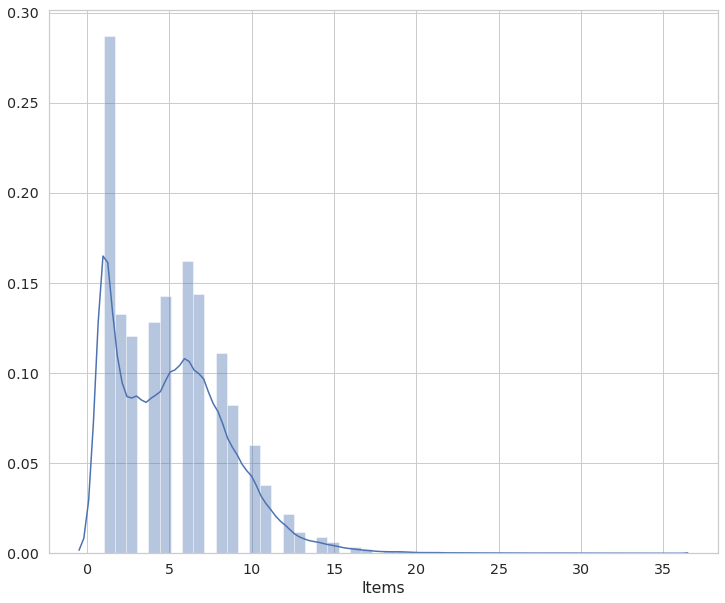

In [ ]:
#Visualize the variable Items distribution

fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.distplot(groupby_invoice['Items'], ax = ax)
plt.show()

**Observations**:

- We have a skewed distribution of products.


- Most people buy less than 20 items.

### 6.2.3 How many products did the customer buy in one purchase?

In [ ]:
total_products = pd.DataFrame(retail_df.groupby('InvoiceNo')['Quantity'].sum())
total_products.columns = ['Items']
total_products.head()

,Items
InvoiceNo,
536365,40
536366,12
536367,83
536368,15
536369,3


In [ ]:
total_products.mean()

Items    220.498
dtype: float64

- In average a customer buys **220** products in one purchase

<a id=section603></a>
## 6.3 Analysis based on Revenue

<a id=section6031></a>
### 6.3.1 What is the total revenue generated by the online retailer?

In [ ]:
retail_df["Revenue"] = retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [ ]:
round(retail_df['Revenue'].sum(), 2)

8278519.42

-  **8.27 million Sterling** is the **total revenue** generated by the online retailer.

### 6.3.2 What is the average revenue per customer?

In [ ]:
avg_revenue = pd.DataFrame(retail_df.groupby('InvoiceNo')['Revenue'].mean())
avg_revenue.columns = ['Average Revenue']
avg_revenue.head()

,Average Revenue
InvoiceNo,
536365,19.874
536366,11.100
536367,23.228
536368,17.513
536369,17.850


In [ ]:
avg_revenue.describe()

,Average Revenue
count,4372.000
mean,28.868
std,127.325
min,-4287.630
25%,11.067
50%,16.941
75%,23.581
max,3861.000


- In average, **34** Sterling revenue is generated per customer 

<a id=section6032></a>
### 6.3.3 What is the total revenue per country?

In [ ]:
retail_df.groupby('Country').sum().sort_values(by = 'Revenue', ascending = False)

,Quantity,UnitPrice,CustomerID,Revenue
Country,,,,
United Kingdom,3994870,1165878.03,5544907004.00,6747156.15
Netherlands,200128,6492.55,34190538.00,284661.54
EIRE,136187,38209.26,110246410.00,250001.78
Germany,117341,37633.44,119881902.00,221509.47
France,109806,42825.23,107441879.00,196626.05
Australia,83643,4048.00,15680571.00,137009.77
Switzerland,29778,6568.60,23775916.00,55739.40
Spain,26817,12621.50,32626727.00,54756.03
Belgium,23152,7540.13,25718288.00,40910.96


- As we can see, the largest market is the one located in **UK**.

In [ ]:
retail_df[retail_df['Country'] == 'United Kingdom']['CustomerID'].nunique()

3950

- So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market.

In [ ]:
retail_uk = retail_df[retail_df['Country'] == 'United Kingdom']
retail_uk.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,356728.00,356728.00,356728.00,356728.00
mean,11.20,3.27,15543.80,18.91
std,265.00,71.16,1594.29,455.16
min,-80995.00,0.00,12346.00,-168469.60
25%,2.00,1.25,14191.00,3.90
50%,4.00,1.95,15513.00,10.20
75%,12.00,3.75,16931.00,17.70
max,80995.00,38970.00,18287.00,168469.60


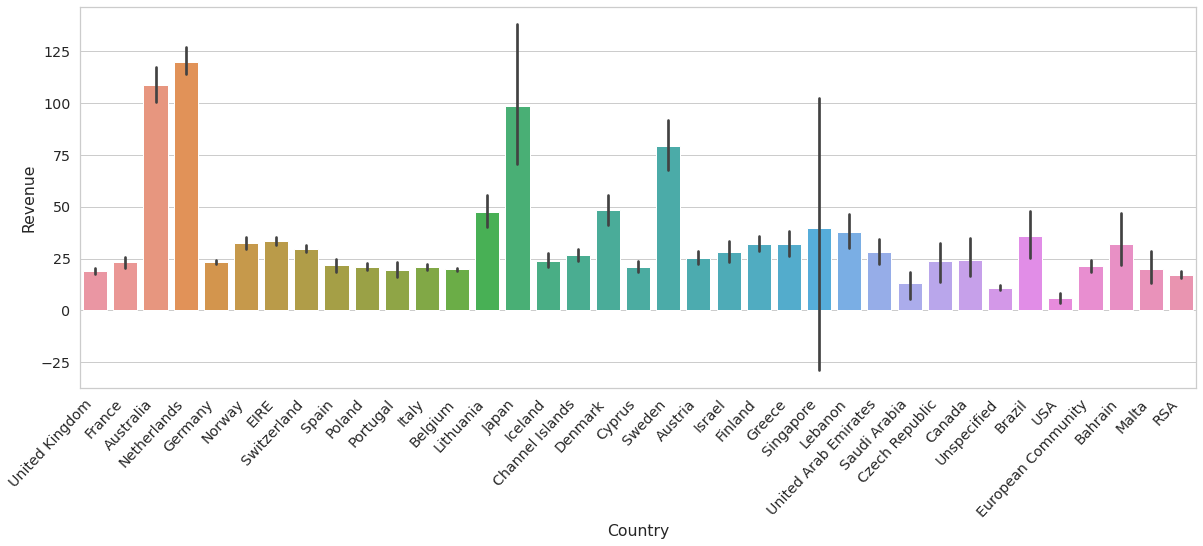

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
ax =sns.barplot(x = 'Country', y = 'Revenue', data = retail_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 47, ha = "right")
plt.show()

In [ ]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )

Number of transactions:  19857
Number of products bought:  3661
Number of customers: 3950


<a id=section6033></a>
### 6.3.4 What is the monthly revenue of the online store?

Revenue (monthly) = Monthly Invoice Count * Quantity * Unit Price

In [ ]:
retail_df['InvoiceYearMonth'] = retail_df['InvoiceDate'].map(lambda date: str(date.year) + '-' + str(date.month))
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12


In [ ]:
retail_df["Revenue"] = retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12


In [ ]:
df_revenue = retail_df.groupby(['InvoiceYearMonth']).agg({'Revenue': sum}).reset_index()
df_revenue

,InvoiceYearMonth,Revenue
0,2010-12,552372.86
1,2011-1,473731.90
2,2011-10,973306.38
3,2011-11,1126815.07
4,2011-12,341539.43
5,2011-2,435534.07
6,2011-3,578576.21
7,2011-4,425222.67
8,2011-5,647011.67
9,2011-6,606862.52


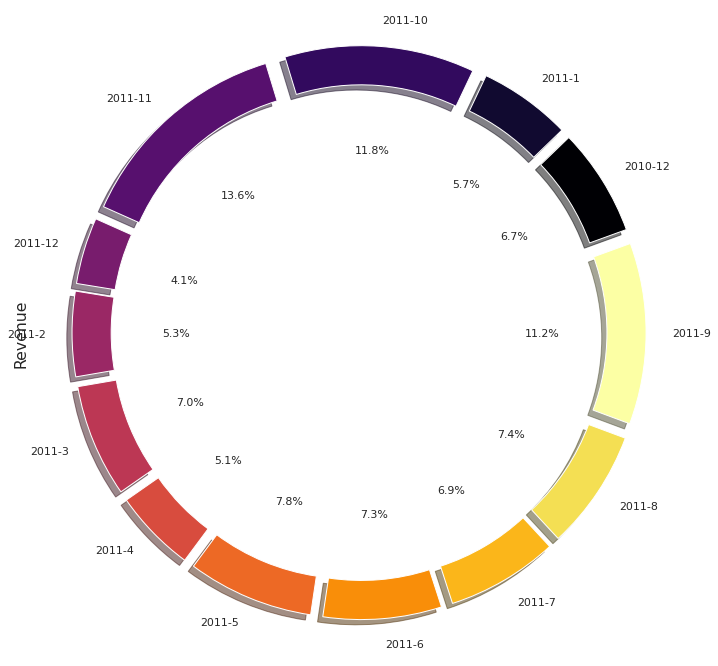

In [ ]:
df_revenue.groupby(['InvoiceYearMonth'])['Revenue'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 explode=np.ones(13)/10, figsize=(12, 12), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='inferno')

- Monthly revenue for the month of **September**, **October**, and **November** are pretty good.


- The reason being, as we have **Halloween**, **Black Friday**, and **Thanksgiving** sales coming up around these months so the customers tend to buy more sort of gifts. 

<a id=section6034></a>
### 6.3.5 What is the monthly growth rate for the online retail store?

In [ ]:
# using pct_change() function to see monthly percentage change

df_revenue['Monthly_Growth'] = df_revenue['Revenue'].pct_change()
df_revenue

,InvoiceYearMonth,Revenue,Monthly_Growth
0,2010-12,552372.86,nan
1,2011-1,473731.90,-0.14
2,2011-10,973306.38,1.05
3,2011-11,1126815.07,0.16
4,2011-12,341539.43,-0.70
5,2011-2,435534.07,0.28
6,2011-3,578576.21,0.33
7,2011-4,425222.67,-0.27
8,2011-5,647011.67,0.52
9,2011-6,606862.52,-0.06


Text(0.5, 1.0, 'Line chart showing the monthly growth of online retailer')

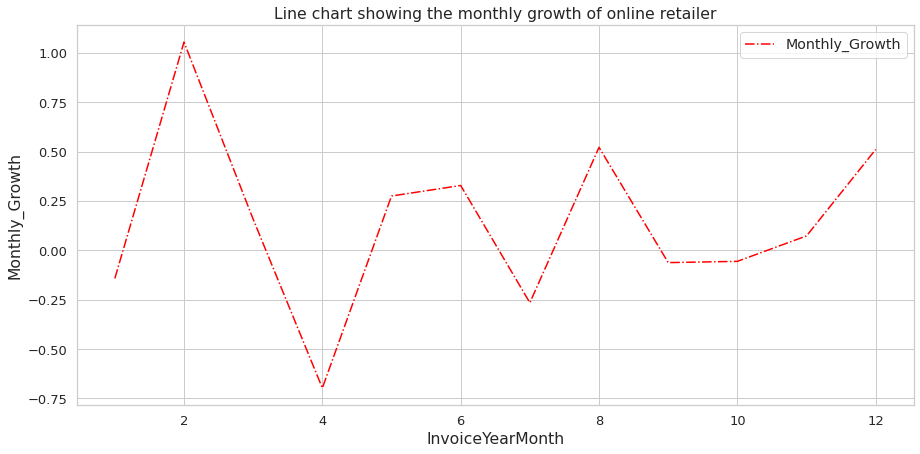

In [ ]:
df_revenue[['Monthly_Growth']].plot(kind='line', figsize=(15,7), color = 'red', fontsize=13, linestyle = '-.')
plt.xlabel('InvoiceYearMonth')
plt.ylabel('Monthly_Growth')
plt.title('Line chart showing the monthly growth of online retailer')

- It seems like the **growth rate** of online store is **fluctuating**. Thers is no stagnant growth over the months.

<a id=section6035></a>
### 6.3.6 What is the average revenue per order?

In [ ]:
avg_revenue_per_order = retail_df.groupby('InvoiceNo')['Revenue'].mean().reset_index()
avg_revenue_per_order.head()

,InvoiceNo,Revenue
0,536365,19.87
1,536366,11.10
2,536367,23.23
3,536368,17.51
4,536369,17.85


In [ ]:
avg_revenue_per_order.describe()

,Revenue
count,22190.00
mean,34.39
std,1809.77
min,-168469.60
25%,5.96
50%,16.76
75%,27.21
max,168469.60


- The average revenue per order is **34.39 Sterling** for the online retailer.

<a id=section604></a>
## 6.4 Analysis based on Geographical Location

<a id=section6041></a>
### 6.4.1 What is the average monthly revenue in UK?

In [ ]:
df_uk = retail_df.query("Country == 'United Kingdom'").reset_index(drop=True)
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12


In [ ]:
df_monthly_revenue = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
df_monthly_revenue

,InvoiceYearMonth,Revenue
0,2010-12,20.03
1,2011-1,18.96
2,2011-10,17.81
3,2011-11,16.29
4,2011-12,18.80
5,2011-2,19.45
6,2011-3,18.76
7,2011-4,17.78
8,2011-5,20.57
9,2011-6,19.61


Text(0.5, 1.0, 'Revenue vs InvoiceYearMonth')

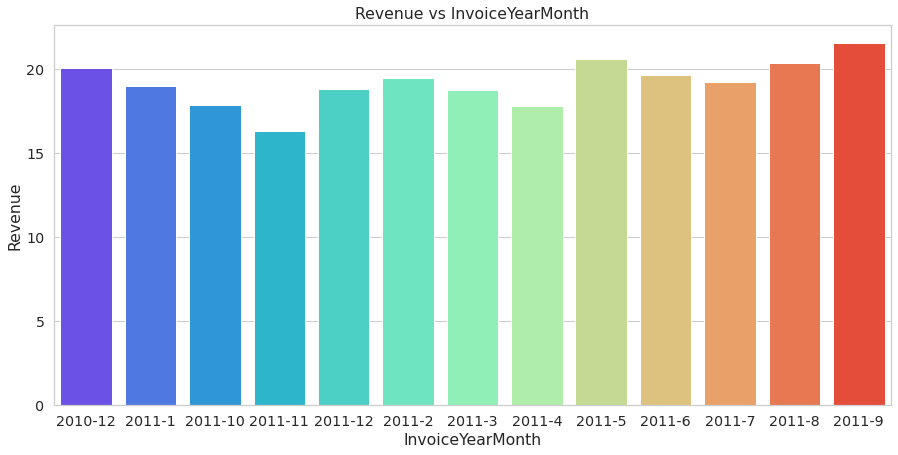

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data = df_monthly_revenue, x = 'InvoiceYearMonth', y = 'Revenue', palette = 'rainbow')

plt.title('Revenue vs InvoiceYearMonth')

<a id=section6042></a>
### 6.4.2 Which products are most bought in UK?

In [ ]:
# check how to show product description instead of StockCode

groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
2501,84077,47886
1017,22197,45194
3349,85099B,40777
2605,84879,32580
3355,85123A,32136
1398,22616,24297
37,17003,22672
352,21212,22182
998,22178,21427
840,21977,19882


In [ ]:
groupedProduct_1 = retail_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
top_10_products = groupedProduct_1.head(10)
top_10_products

,StockCode,Description,Quantity
2694,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,47886
3562,85099B,JUMBO BAG RED RETROSPOT,40777
2800,84879,ASSORTED COLOUR BIRD ORNAMENT,32580
3569,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32079
1032,22197,POPCORN HOLDER,28550
1427,22616,PACK OF 12 LONDON TISSUES,24297
37,17003,BROCADE RING PURSE,22672
356,21212,PACK OF 72 RETROSPOT CAKE CASES,22182
1012,22178,VICTORIAN GLASS HANGING T-LIGHT,21427
851,21977,PACK OF 60 PINK PAISLEY CAKE CASES,19882


Text(0.5, 1.0, 'Top 10 products')

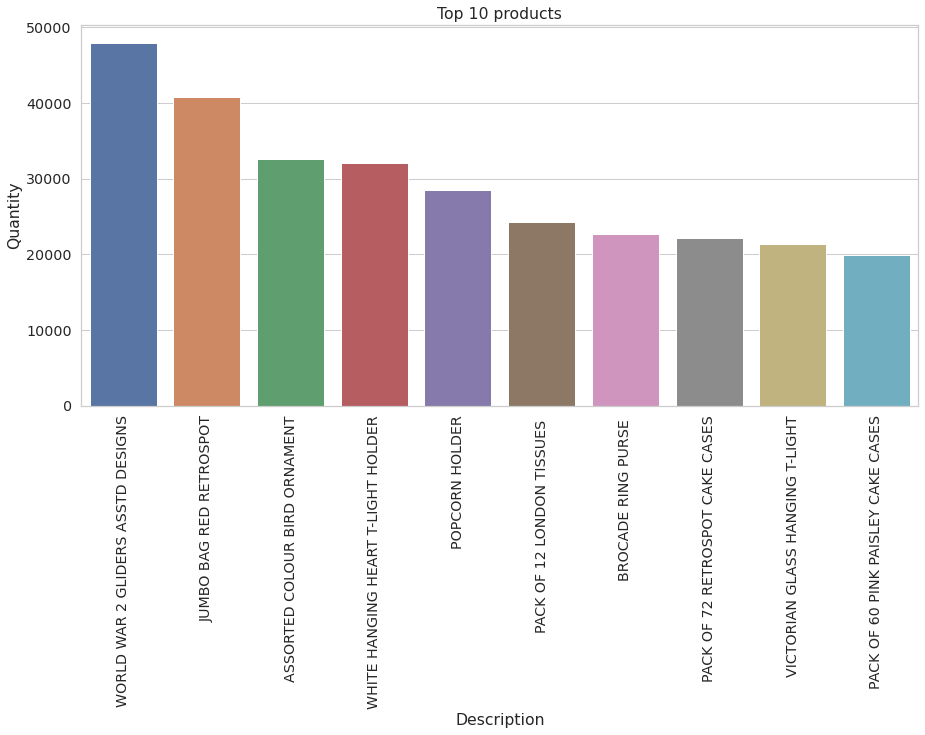

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data = top_10_products, x = 'Description', y = 'Quantity')
plt.xticks(rotation=90)
plt.title('Top 10 products')

In [ ]:
invoice_quantity = retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
16623,581483,80995
1746,541431,74215
11184,567423,12572
15579,578841,12540
9338,562439,11848


It's important to know more about these most bought products. Is there any products that when one of them is bought, the other is bought too?

<a id=section6043></a>
### 6.4.3 How many monthly active customers for UK?

In [ ]:
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active

,InvoiceYearMonth,CustomerID
0,2010-12,871
1,2011-1,684
2,2011-10,1285
3,2011-11,1548
4,2011-12,617
5,2011-2,714
6,2011-3,923
7,2011-4,817
8,2011-5,985
9,2011-6,943


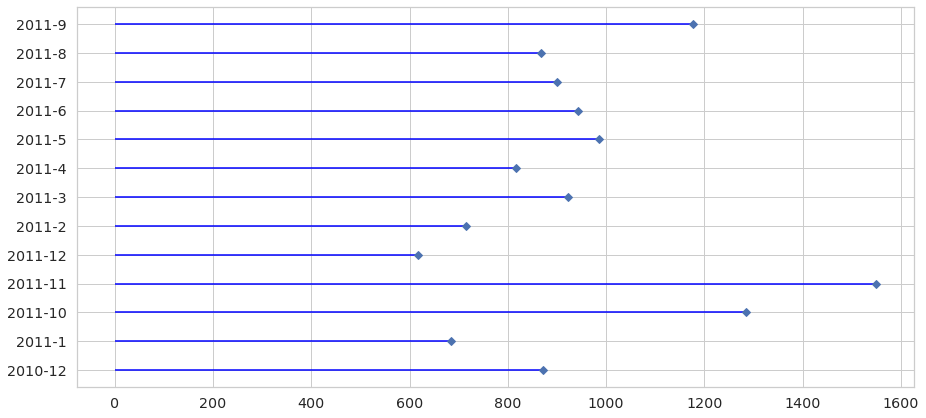

In [ ]:
plt.figure(figsize=(15,7))
plt.hlines(df_monthly_active['InvoiceYearMonth'],xmin=0,xmax=df_monthly_active['CustomerID'],color='blue')
plt.plot(df_monthly_active['CustomerID'],df_monthly_active['InvoiceYearMonth'] , "D")


<a id=section7></a>
## 7. Conclusion

- We almost have 40% Cancelled orders which is a pretty big number for online retailer.
- Studying these cancelled orders may help in preventing future cancellation. Let's first get an overview of the general customers purchase behavior and then dig deeper.
- The average number of unique items per order are 5.
- The average revenue per order is **34.39 Sterling** for the online retailer.
- Not only most sales revenues are achieved in the UK, but also most customers are located there too.

# 8. Actionable Insights

- By analysing the data in this way, we can uncover **groups of customers** that behave in similar ways. This level of **customer segmentation** is useful in marketing to these groups of customers appropriately.


- A **marketing campaign** that works for a group of customers that places **low value orders** frequently may not be appropriate for customers who place sporadic, **high value orders**.


- Make relevant **product recommendations** to the customers using **precision marketing**.


- Empower your customers to actively share their details, **make your customers part of the process**. Encourage them to share their **data** with you through **conversations**, **surveys**, and other **research methods**. Doing so not only help you get to know them better, but it also **builds trust**.


- Additionally, before performing analysis it would be important to **talk with the e-commerce team to understand the business and its customers and its strategic and tactical objectives**. Knowing what the business wants to achieve, and what questions it has are central to performing a relevant analysis that generates **actionable insights**.